In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from number_of_experimetns import calculate_number_of_replicas
from experimenter_knative import experiment_with
import pandas as pd 
sns.set_theme()

In [7]:
# Maximum number of replicas that the system can manage.
MAX_REPLICA_COUNT = 100

# Number of experiments
NUMBER_OF_EXPERIMENTS = 5

# Each experiment will be done by this many times for consistency.
EXPERIMENT_PROOF = 5

# Int array of replicas for each experiment
REPLICAS: np.ndarray = calculate_number_of_replicas(MAX_REPLICA_COUNT, NUMBER_OF_EXPERIMENTS)

# How much should we wait for the kubernetes api to be stabilized
COOLDOWNS: np.ndarray = 2 * np.ones((NUMBER_OF_EXPERIMENTS,), dtype=int) + (REPLICAS * 0.004).astype(int)

# Namespace of the experimentation
NAMESPACE = "experiments"

# Driver used in kubectl
DRIVER = "minikube"

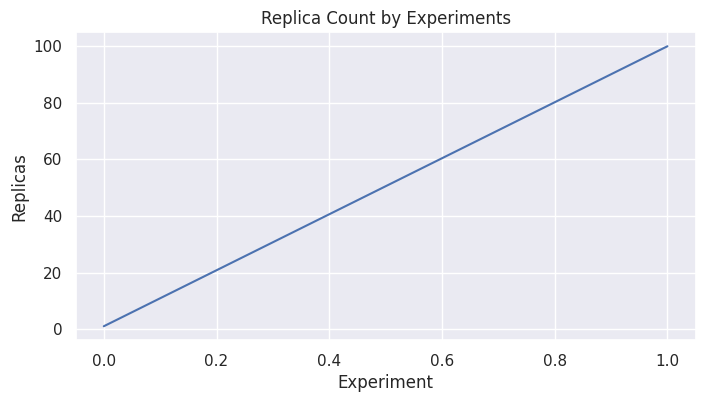

[2 2]
[  1 100]


In [8]:
def draw_replicas(replicas=REPLICAS):
    plt.figure(figsize=(8, 4))
    plt.plot(range(len(replicas)), replicas)
    plt.title("Replica Count by Experiments")
    plt.xlabel("Experiment")
    plt.ylabel("Replicas")
    plt.show()

draw_replicas()
print(COOLDOWNS)
print(REPLICAS)

In [9]:
# Do the experiment
experiment_with(REPLICAS.tolist(), NAMESPACE, COOLDOWNS.tolist(), EXPERIMENT_PROOF, DRIVER)

Estimated time 14 second(s) in ./exps/20230223_224500.feather.
Experiment of 1 step(s) with 1 replica(s) in 'knative' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 3 second(s)
Experiment of 1 step(s) with 100 replica(s) in 'knative' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 102 second(s)


In [24]:
data_df = pd.read_feather("exps/20230223_224500.feather")
data_df["creation_timedelta"] = data_df["experiment_deployment_creation_finished_date"] - data_df["experiment_deployment_creation_started_date"]
data_df["deletion_timedelta"] = data_df["experiment_deployment_deletion_finished_date"] - data_df["experiment_deployment_deletion_started_date"]
data_df

,test,experiment_start_date,experiment_finsh_date,experiment_deployment_becoma_ready_date,experiment_deployment_creation_started_date,experiment_deployment_creation_finished_date,experiment_deployment_deletion_started_date,experiment_deployment_deletion_finished_date,replicas,framework,error_occured,exception,step,total_steps,cool_period,driver,command,creation_timedelta,deletion_timedelta
0,NaN,2023-02-23 22:45:00.708365,2023-02-23 22:45:05.767746,2023-02-23 22:45:03.767663,2023-02-23 22:45:00.708365,2023-02-23 22:45:00.723892,2023-02-23 22:45:05.767740,2023-02-23 22:45:05.767746,1.0,knative,False,"[None, None, None]",0.0,1.0,2.0,minikube,"[/bin/sh, -c, sleep 9999]",0 days 00:00:00.015527,0 days 00:00:00.000006
1,NaN,2023-02-23 22:45:05.792333,2023-02-23 22:47:46.238550,2023-02-23 22:47:44.238467,2023-02-23 22:45:05.792333,2023-02-23 22:45:05.805748,2023-02-23 22:47:46.238545,2023-02-23 22:47:46.238550,100.0,knative,False,"[None, None, None]",0.0,1.0,2.0,minikube,"[/bin/sh, -c, sleep 9999]",0 days 00:00:00.013415,0 days 00:00:00.000005
